# EDA & Modelling

## Package loading

In [99]:
from EZS_deps.EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


## Exploratory Data Analysis 

### File and parameters loading

In [100]:
problem_type = 'classification'

In [101]:
stacking = 'True'

In [102]:
data_size = 'small'

In [103]:
df = pd.read_csv('/home/phbillet/Documents/python project/EZStacking-main/dataset/diabetes2.csv')

In [104]:
target_col = 'Outcome'

#### Thresholds

In [105]:
threshold_NaN = 0.5

In [106]:
threshold_cat = 5

In [107]:
threshold_Z = 3.0

In [108]:
test_size = 0.33

In [109]:
threshold_entropy = 0.75

In [110]:
threshold_corr = 0.95

In [111]:
threshold_model = 5

In [112]:
threshold_score = 0.7

In [113]:
threshold_feature = 5

#### Drop user's columns:
_Notes:_
* at the end of the first round feature elimination gives the following columns.

In [114]:
user_drop_cols = ['BloodPressure', 'Insulin', 'SkinThickness']

Dataset before deletion

In [115]:
display(df)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [116]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [117]:
display(df)

Pregnancies  Glucose   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148  33.6                     0.627   50        1
1              1       85  26.6                     0.351   31        0
2              8      183  23.3                     0.672   32        1
3              1       89  28.1                     0.167   21        0
4              0      137  43.1                     2.288   33        1
..           ...      ...   ...                       ...  ...      ...
763           10      101  32.9                     0.171   63        0
764            2      122  36.8                     0.340   27        0
765            5      121  26.2                     0.245   30        0
766            1      126  30.1                     0.349   47        1
767            1       93  30.4                     0.315   23        0

[768 rows x 6 columns]

#### Dataset copy

In [118]:
df_copy = df.copy()

### Dataset Information

In [119]:
df.shape

(768, 6)

#### Some records

In [120]:
display(df)

Pregnancies  Glucose   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148  33.6                     0.627   50        1
1              1       85  26.6                     0.351   31        0
2              8      183  23.3                     0.672   32        1
3              1       89  28.1                     0.167   21        0
4              0      137  43.1                     2.288   33        1
..           ...      ...   ...                       ...  ...      ...
763           10      101  32.9                     0.171   63        0
764            2      122  36.8                     0.340   27        0
765            5      121  26.2                     0.245   30        0
766            1      126  30.1                     0.349   47        1
767            1       93  30.4                     0.315   23        0

[768 rows x 6 columns]

#### Dataframe structure

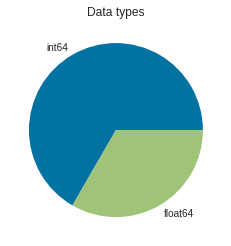

In [121]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [122]:
display(df.describe().T)

count        mean        std     min       25%  \
Pregnancies               768.0    3.845052   3.369578   0.000   1.00000   
Glucose                   768.0  120.894531  31.972618   0.000  99.00000   
BMI                       768.0   31.992578   7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078   0.24375   
Age                       768.0   33.240885  11.760232  21.000  24.00000   
Outcome                   768.0    0.348958   0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

#### Which columns could be categorical ?

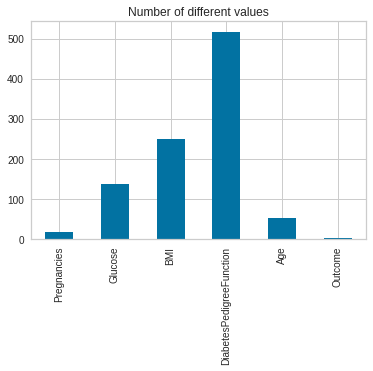

In [123]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [124]:
duplicates(df)

No duplicate rows.


Pregnancies  Glucose   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148  33.6                     0.627   50        1
1              1       85  26.6                     0.351   31        0
2              8      183  23.3                     0.672   32        1
3              1       89  28.1                     0.167   21        0
4              0      137  43.1                     2.288   33        1
..           ...      ...   ...                       ...  ...      ...
763           10      101  32.9                     0.171   63        0
764            2      122  36.8                     0.340   27        0
765            5      121  26.2                     0.245   30        0
766            1      126  30.1                     0.349   47        1
767            1       93  30.4                     0.315   23        0

[768 rows x 6 columns]

#### Drop NaN:

In [125]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [126]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [127]:
display(dropped_cols)

array(['BloodPressure', 'Insulin', 'SkinThickness'], dtype='<U32')

#### Encoding data:

In [128]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: Pregnancies
Encoding numeric column: Glucose
Encoding numeric column: BMI
Encoding numeric column: DiabetesPedigreeFunction
Encoding numeric column: Age
Column  Outcome  is categorical.


#### Imputing NaN using IterativeImputer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


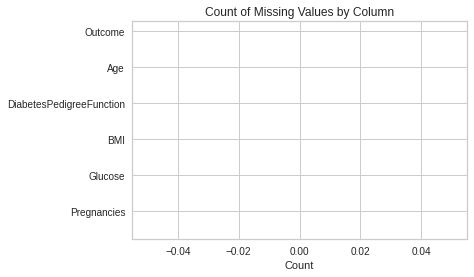

In [129]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [130]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [131]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.04MB
Memory usage after optimization is: 0.01MB
Decreased by 76.8%


##### Dataframe structure after compression

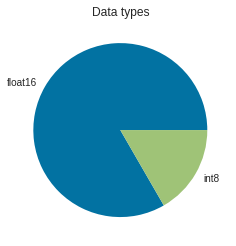

In [132]:
plot_dataframe_structure(df)

#### Outliers:

In [133]:
df = outliers(df, threshold_Z)

Using Z_score,  36  rows will be suppressed.


### Plottings

#### Ranking 

##### Ranking 1D 

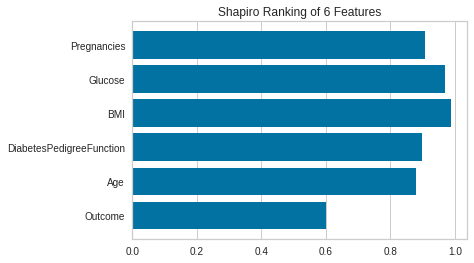

In [134]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

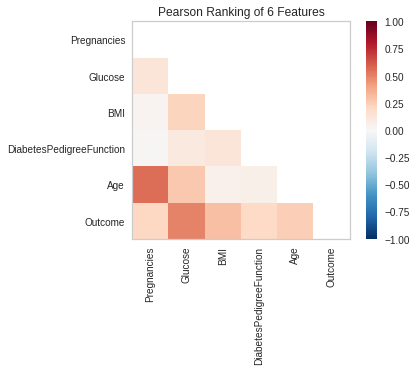

In [135]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

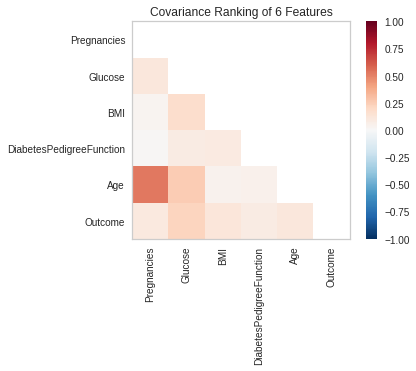

In [136]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

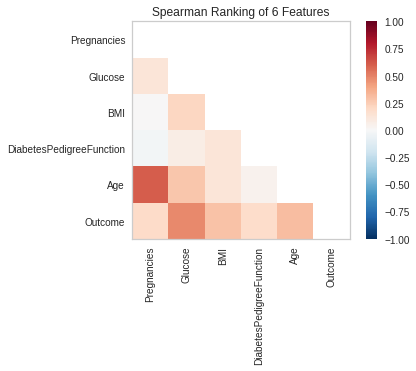

In [137]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

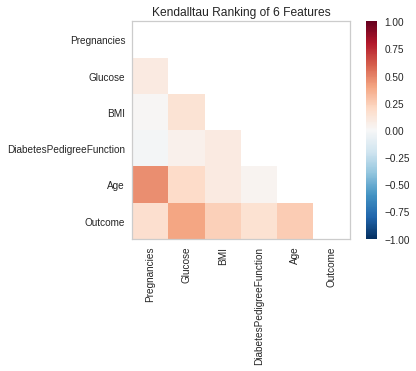

In [138]:
rank2d(df, algorithm='kendalltau');

#### Correlation

In [139]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [140]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

##### Splitting dataframe in features and targets

In [141]:
y = df[target_col]

In [142]:
X = df.drop(target_col, axis=1)

###### Correlation with Yellow Bricks

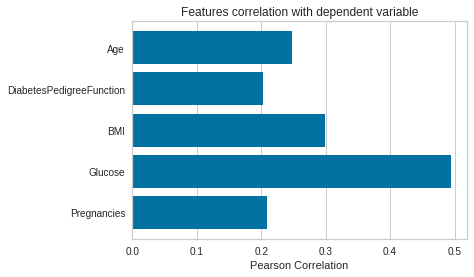

In [143]:
feature_correlation(X, y);

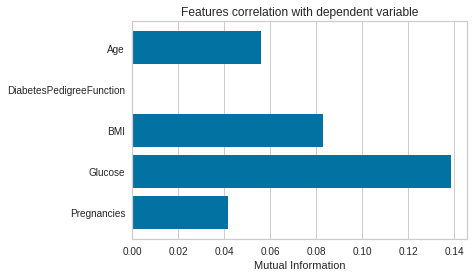

In [144]:
feature_correlation(X, y, method='mutual_info-classification');

#### Feature importance (a priori)

##### According to decision tree

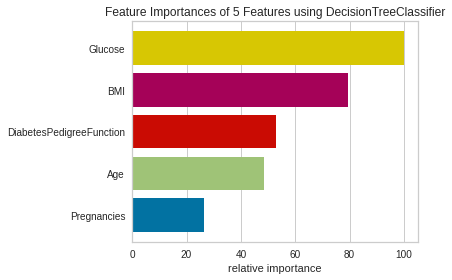

In [145]:
feature_importances(DecisionTreeClassifier(), X, y);

##### According to logistic regression

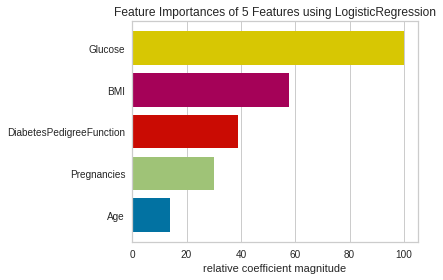

In [146]:
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

#### PCA

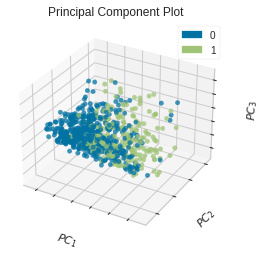

In [147]:
pca_decomposition(X, y.astype(int), projection=3);

#### Class balancing

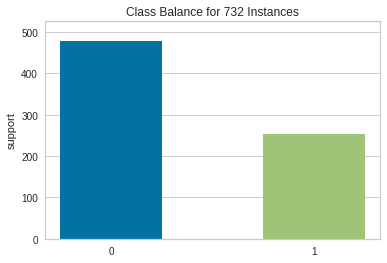

Entropy =  0.9313552417609168


In [148]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

#### Check columns that should be dropped

In [149]:
print(dropped_cols)

[]


## Splittings 

In [150]:
df = df_copy

#### Splitting dataframe in features and targets

In [151]:
y = df[target_col]

In [152]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [153]:
nb_features = len(X.columns.tolist())

In [154]:
nb_targets = len(y.unique())

In [155]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [156]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy)

##### Encoding

In [157]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [158]:
cat_selector = make_column_selector(dtype_include=object)

In [159]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [160]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [161]:
num_tree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True))

In [162]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

##### For models not based on tree

In [163]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))

In [164]:
num_ntree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), StandardScaler())

In [165]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

##### Level-0 models

In [166]:
level_0 = [ 
          ('GPCL', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel()))), 
          ('GPCR', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel()))), 
          ('GPCQ', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel()))), 
          ('DTCG', make_pipeline(ntree_preprocessor, DecisionTreeClassifier(criterion='gini'))), 
          ('DTCE', make_pipeline(ntree_preprocessor, DecisionTreeClassifier(criterion='entropy'))), 
          ('RFCG', make_pipeline(ntree_preprocessor, RandomForestClassifier(criterion='gini', n_estimators=50))), 
          ('RFCE', make_pipeline(ntree_preprocessor, RandomForestClassifier(criterion='entropy', n_estimators=50))), 
          ('ABC', make_pipeline(ntree_preprocessor, AdaBoostClassifier())), 
          ('HGBC', make_pipeline(ntree_preprocessor, HistGradientBoostingClassifier(early_stopping=True))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2'))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.15))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2'))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2'))), 
          ('MLPC10', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (10 * layer_size, 10 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('MLPC20', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (20 * layer_size, 20 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('KNCU', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='uniform', n_neighbors=len(y.unique())))), 
          ('KNCD', make_pipeline(ntree_preprocessor, KNeighborsClassifier(weights='distance', n_neighbors=len(y.unique())))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ]

##### Level-1 model

In [167]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], n_jobs=-1)

##### Stacking for classification

In [168]:
model = StackingClassifier(level_0, final_estimator=level_1, n_jobs=-1)

### Model fitting

In [169]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/

CPU times: user 3.42 s, sys: 32.9 ms, total: 3.45 s
Wall time: 37.5 s


StackingClassifier(estimators=[('GPCL',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    SimpleImputer(add_indicator=True)),
                                                                                                                   ('standardscaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ede7376d0>),
                                                                                                  ('pipeline-2...
                                                                                                                   ('onehotencoder',
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ede737d60>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=0.95))])),
                                                ('gaussiannb',
                                                 GaussianNB())]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        n_jobs=-1,
                                                        penalty='elasticnet',
                                                        solver='saga'),
                   n_jobs=-1)

### Model evaluation

#### Model scoring

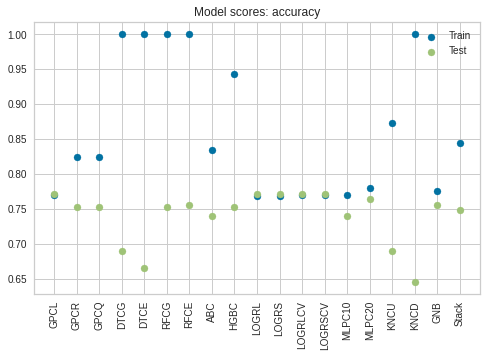

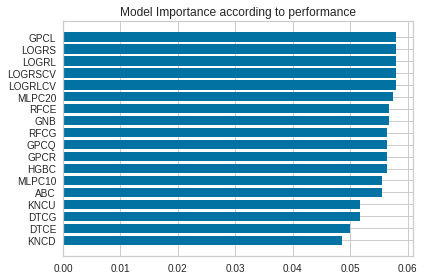

In [170]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

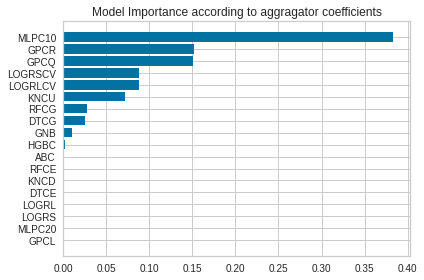

In [171]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

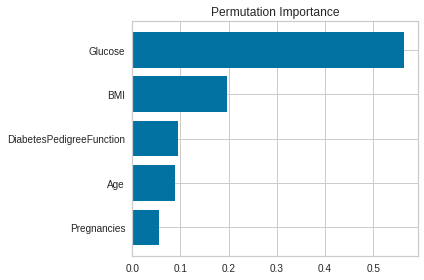

array([['Pregnancies', 0.05636363636363633],
       ['Age', 0.08909090909090911],
       ['DiabetesPedigreeFunction', 0.0945454545454545],
       ['BMI', 0.19636363636363646],
       ['Glucose', 0.5636363636363637]], dtype=object)

In [172]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [173]:
features_of_interest = []

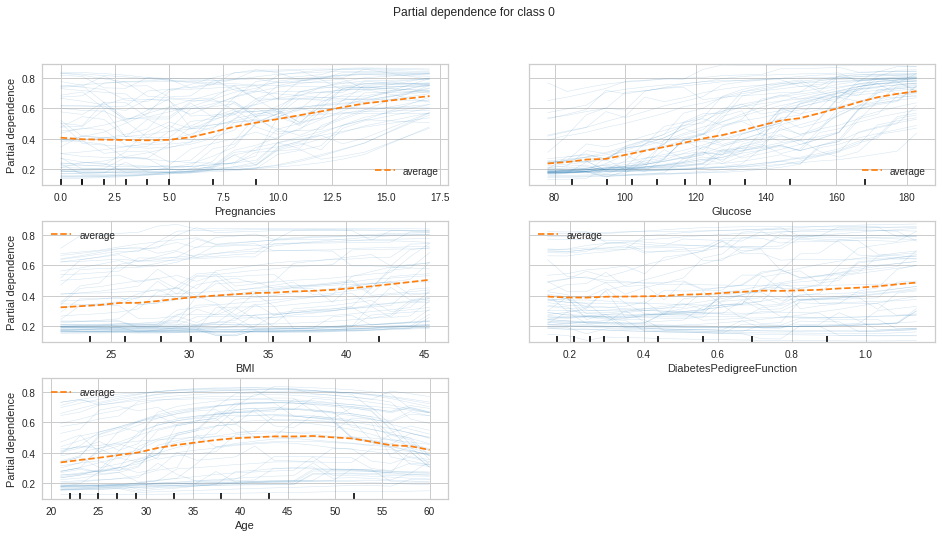

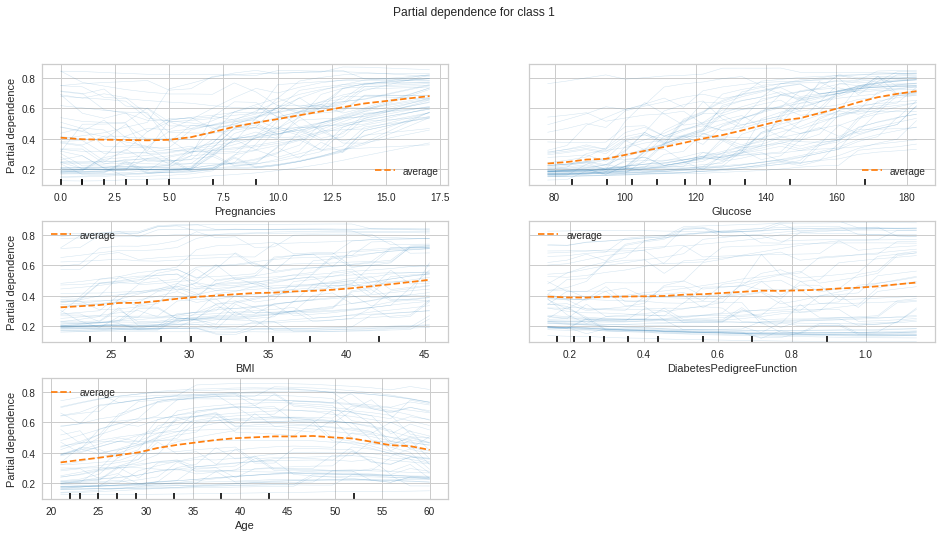

In [174]:
plot_partial_dependence(model, X_train, features_of_interest)

#### ROC/AUC

In [175]:
classes = y.unique()

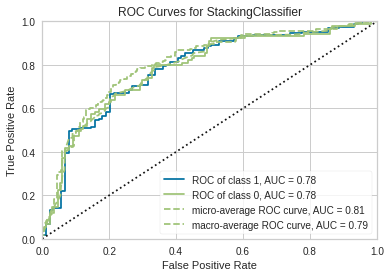

In [176]:
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Classification report

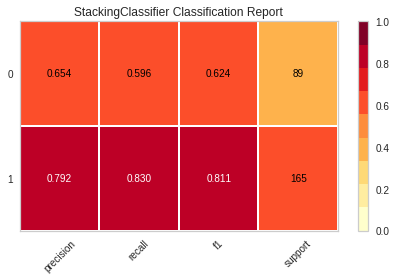

In [177]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Confusion matrix

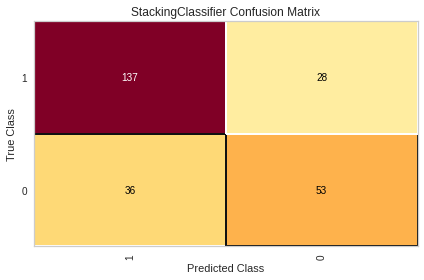

In [178]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Class prediction error

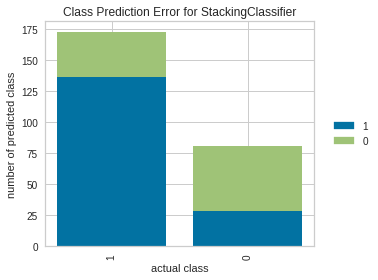

In [179]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

### Final Model

In [180]:
threshold_model = 5

In [181]:
threshold_score = 0.7

##### Filtered Level-0 models

In [182]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [183]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], n_jobs=-1)

##### Build final model

In [184]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

### Final Model fitting

In [185]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacki

CPU times: user 675 ms, sys: 29.8 ms, total: 705 ms
Wall time: 27.7 s


StackingClassifier(estimators=[('GPCR',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    SimpleImputer(add_indicator=True)),
                                                                                                                   ('standardscaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ede7376d0>),
                                                                                                  ('pipeline-2...
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ede737d60>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=0.95))])),
                                                ('mlpclassifier',
                                                 MLPClassifier(early_stopping=True,
                                                               hidden_layer_sizes=(90,
                                                                                   90),
                                                               max_iter=1000))]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        n_jobs=-1,
                                                        penalty='elasticnet',
                                                        solver='saga'),
                   n_jobs=-1)

#### Final Model scoring

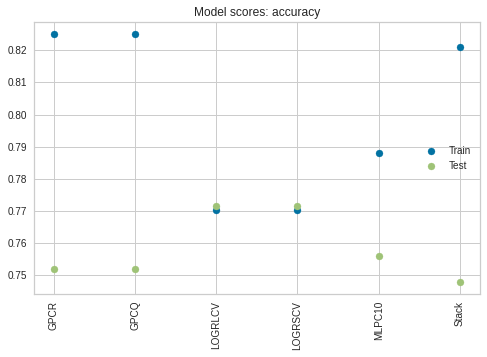

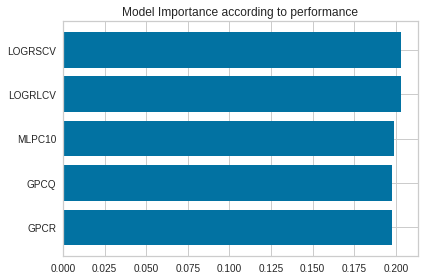

(array([['GPCR', 0.8249027237354085, 0.7519685039370079],
        ['GPCQ', 0.8249027237354085, 0.7519685039370079],
        ['LOGRLCV', 0.7704280155642024, 0.7716535433070866],
        ['LOGRSCV', 0.7704280155642024, 0.7716535433070866],
        ['MLPC10', 0.7879377431906615, 0.7559055118110236],
        ['Stack', 0.8210116731517509, 0.7480314960629921]], dtype=object),
 array([['GPCR', 0.19772256728778467],
        ['GPCQ', 0.19772256728778467],
        ['MLPC10', 0.1987577639751553],
        ['LOGRLCV', 0.20289855072463767],
        ['LOGRSCV', 0.20289855072463767]], dtype=object))

In [186]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

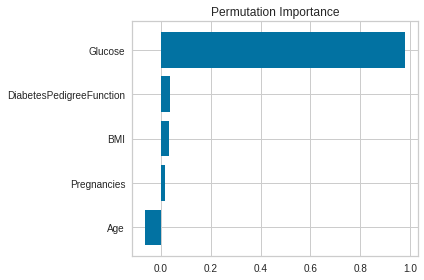

In [187]:
feature_importance = plot_perm_importance(model, X_test, y_test)

##### Final feature elimination

In [188]:
best_feature, worst_feature = feature_filtering(feature_importance, threshold_feature)

In [189]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [190]:
print(dropped_cols)

[]


#### Final ROC/AUC

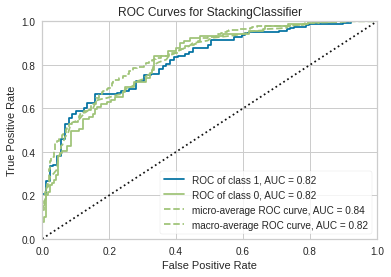

In [191]:
classes = y.unique() 
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Final Classification report

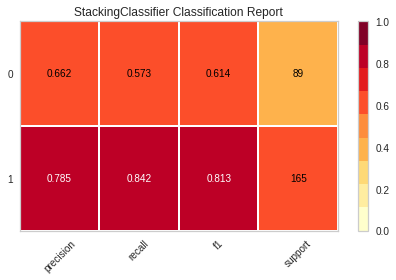

In [192]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Final Confusion matrix

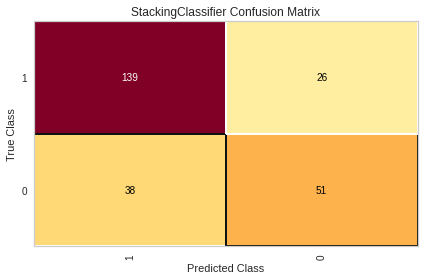

In [193]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Final Class prediction error

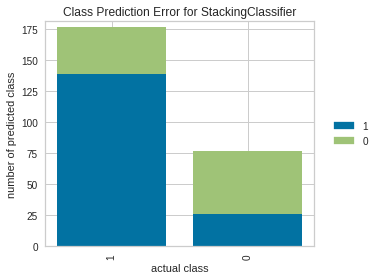

In [194]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

## Deployment

### Save your model

In [195]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate your server

In [196]:
fastapi_server(model, 'model.sav', X, y)

### [Test your API](./server.ipynb)